## Lab 1.3 - Predicting Real Estate Data in St. Petersburg
We have data from Yandex.Realty classified https://realty.yandex.ru containing real estate listings for apartments in St. Petersburg and Leningrad Oblast from 2016 till the middle of August 2018. In this Lab you'll learn how to apply machine learning algorithms to solve business problems. Accurate price prediction can help to find fraudsters automatically and help Yandex.Realty users to make better decisions when buying and selling real estate.

Using python with machine learning algotithms is the #1 option for prototyping solutions among data scientists today. We'll take a look at it in this lab.

### Main objectives
After successful completion of the lab work students will be able to:
-	Apply machine learning for solving price prediction problem
-   Calculate metrics which can help us find out whether our machine learning model is ready for production

### Tasks
-	Encode dataset
-	Split dataset to train and validation datasets
-	Apply decision tree algorithm to build ML (machine learning) model for price predictions
-   Calculate metrics
-   Try other algorithms and factors to get a better solution 


### 1. Load data with real estate prices

In [3]:
# let's import pandas library and set options to be able to view data right in the browser
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.style as style
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
style.use('fivethirtyeight')


In [4]:
rent_df_cleaned = pd.read_csv('cleaned_dataset.csv')

In [5]:
rent_df_cleaned.head()

,first_day_exposition,last_day_exposition,last_price,open_plan,rooms,area,renovation,last_price_log
0,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,0,1,28.0,3.0,9.903488
1,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,0,2,59.0,3.0,10.085809
2,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,0,1,36.0,3.0,9.798127
3,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,0,1,39.0,0.0,9.798127
4,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,0,1,36.0,11.0,9.852194


In [6]:
rent_df_cleaned.describe()

,last_price,open_plan,rooms,area,renovation,last_price_log
count,155391.000000,155391.000000,155391.000000,155391.000000,155391.000000,155391.000000
mean,31890.005689,0.000051,1.599301,53.358332,2.442580,10.243641
std,20303.603089,0.007175,0.872411,24.097864,4.047318,0.460829
min,9990.000000,0.000000,0.000000,11.000000,0.000000,9.209340
25%,20000.000000,0.000000,1.000000,38.000000,0.000000,9.903488
50%,25000.000000,0.000000,1.000000,46.000000,0.000000,10.126631
75%,35000.000000,0.000000,2.000000,62.000000,3.000000,10.463103
max,199000.000000,1.000000,5.000000,200.000000,11.000000,12.201060


## DATA TRANSFORMATION

In [7]:
(rent_df_cleaned.isna().sum() / len(rent_df_cleaned)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,percent of NA
first_day_exposition,0.00%
last_day_exposition,0.00%
last_price,0.00%
open_plan,0.00%
rooms,0.00%
area,0.00%
renovation,0.00%
last_price_log,0.00%


In [8]:
rent_df_cleaned.renovation.value_counts()

0.0     102910
3.0      16407
11.0     14076
10.0     13876
7.0       3882
1.0       3125
6.0        698
8.0        225
2.0        159
4.0         32
5.0          1
Name: renovation, dtype: int64

In [9]:
rent_df_cleaned.first_day_exposition = pd.to_datetime(rent_df_cleaned.first_day_exposition)
rent_df_cleaned.last_day_exposition = pd.to_datetime(rent_df_cleaned.last_day_exposition)

In [10]:
rent_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155391 entries, 0 to 155390
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype                                
---  ------                --------------   -----                                
 0   first_day_exposition  155391 non-null  datetime64[ns, pytz.FixedOffset(180)]
 1   last_day_exposition   155391 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   last_price            155391 non-null  float64                              
 3   open_plan             155391 non-null  int64                                
 4   rooms                 155391 non-null  int64                                
 5   area                  155391 non-null  float64                              
 6   renovation            155391 non-null  float64                              
 7   last_price_log        155391 non-null  float64                              
dtypes: datetime64[ns, pytz.FixedOffset(180)](2), float64(4), int64(2)

In [11]:
rent_df_cleaned['Difference'] = (rent_df_cleaned['last_day_exposition'] - rent_df_cleaned['first_day_exposition']).dt.days

In [12]:
rent_df_cleaned.head()

,first_day_exposition,last_day_exposition,last_price,open_plan,rooms,area,renovation,last_price_log,Difference
0,2015-01-24 00:00:00+03:00,2016-01-19 00:00:00+03:00,20000.0,0,1,28.0,3.0,9.903488,360
1,2015-11-17 00:00:00+03:00,2016-03-04 00:00:00+03:00,24000.0,0,2,59.0,3.0,10.085809,108
2,2015-11-17 00:00:00+03:00,2016-04-24 00:00:00+03:00,18000.0,0,1,36.0,3.0,9.798127,159
3,2016-02-04 00:00:00+03:00,2016-02-28 00:00:00+03:00,18000.0,0,1,39.0,0.0,9.798127,24
4,2016-02-28 00:00:00+03:00,2016-04-02 00:00:00+03:00,19000.0,0,1,36.0,11.0,9.852194,34


In [13]:
renovation_encoded = pd.get_dummies(rent_df_cleaned, columns=['renovation','open_plan','rooms'])

In [14]:
renovation_encoded

,first_day_exposition,last_day_exposition,last_price,area,last_price_log,Difference,renovation_0.0,renovation_1.0,renovation_2.0,renovation_3.0,renovation_4.0,renovation_5.0,renovation_6.0,renovation_7.0,renovation_8.0,renovation_10.0,renovation_11.0,open_plan_0,open_plan_1,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,rooms_5
0,2015-01-24 00:00:00+03:00,2016-01-19 00:00:00+03:00,20000.0,28.0,9.903488,360,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2015-11-17 00:00:00+03:00,2016-03-04 00:00:00+03:00,24000.0,59.0,10.085809,108,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2015-11-17 00:00:00+03:00,2016-04-24 00:00:00+03:00,18000.0,36.0,9.798127,159,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2016-02-04 00:00:00+03:00,2016-02-28 00:00:00+03:00,18000.0,39.0,9.798127,24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2016-02-28 00:00:00+03:00,2016-04-02 00:00:00+03:00,19000.0,36.0,9.852194,34,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155386,2018-08-20 00:00:00+03:00,2018-08-20 00:00:00+03:00,26000.0,32.0,10.165852,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
155387,2018-08-20 00:00:00+03:00,2018-08-20 00:00:00+03:00,27000.0,39.0,10.203592,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
155388,2018-08-20 00:00:00+03:00,2018-08-20 00:00:00+03:00,30000.0,67.0,10.308953,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
155389,2018-08-20 00:00:00+03:00,2018-08-20 00:00:00+03:00,50000.0,56.0,10.819778,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().fit(renovation_encoded[['area','Difference']])
data_std_scaled = std_scaler.transform(renovation_encoded[['area','Difference']])

minmax_scaler = MinMaxScaler().fit(renovation_encoded[['area','Difference']])
data_minmax_scaled = minmax_scaler.transform(renovation_encoded[['area','Difference']])

In [16]:
renovation_encoded['st-ed_area'] = data_std_scaled[:,0]
renovation_encoded['st-ed_Difference'] = data_std_scaled[:,1]


In [17]:
renovation_encoded.head()

,first_day_exposition,last_day_exposition,last_price,area,last_price_log,Difference,renovation_0.0,renovation_1.0,renovation_2.0,renovation_3.0,renovation_4.0,renovation_5.0,renovation_6.0,renovation_7.0,renovation_8.0,renovation_10.0,renovation_11.0,open_plan_0,open_plan_1,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,rooms_5,st-ed_area,st-ed_Difference
0,2015-01-24 00:00:00+03:00,2016-01-19 00:00:00+03:00,20000.0,28.0,9.903488,360,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-1.052310,1.104387
1,2015-11-17 00:00:00+03:00,2016-03-04 00:00:00+03:00,24000.0,59.0,10.085809,108,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.234116,-0.033085
2,2015-11-17 00:00:00+03:00,2016-04-24 00:00:00+03:00,18000.0,36.0,9.798127,159,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-0.720329,0.197118
3,2016-02-04 00:00:00+03:00,2016-02-28 00:00:00+03:00,18000.0,39.0,9.798127,24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-0.595836,-0.412242
4,2016-02-28 00:00:00+03:00,2016-04-02 00:00:00+03:00,19000.0,36.0,9.852194,34,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,-0.720329,-0.367104


In [18]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= renovation_encoded['last_price']
data = renovation_encoded
X = renovation_encoded.drop(columns=['last_day_exposition', 'first_day_exposition', 'first_day_exposition','last_price_log','last_price'])

In [19]:
X

,area,Difference,renovation_0.0,renovation_1.0,renovation_2.0,renovation_3.0,renovation_4.0,renovation_5.0,renovation_6.0,renovation_7.0,renovation_8.0,renovation_10.0,renovation_11.0,open_plan_0,open_plan_1,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,rooms_5,st-ed_area,st-ed_Difference
0,28.0,360,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-1.052310,1.104387
1,59.0,108,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.234116,-0.033085
2,36.0,159,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-0.720329,0.197118
3,39.0,24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-0.595836,-0.412242
4,36.0,34,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,-0.720329,-0.367104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155386,32.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-0.886319,-0.520573
155387,39.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-0.595836,-0.520573
155388,67.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.566096,-0.520573
155389,56.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.109623,-0.520573


## MODELS

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape

dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=19, max_features=22)
dt.fit(X_train, y_train)

dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)


mape_test  = mape(y_test ,dt_pred_test)
mape_train = mape(y_train ,dt_pred_train)

print('-------------ДЕРЕВО-------------')
accuracy = dt.score(X_test,y_test)
print("MAPE_test = {:.2f}".format((mape_test)))
print('Accuracy = ', accuracy*100,'%')
print("MAPE_train = {:.2f}".format((mape_train)))
print('Accuracy = ', accuracy*100,'%')

-------------ДЕРЕВО-------------
MAPE_test = 0.22
Accuracy =  65.73925077891177 %
MAPE_train = 0.21
Accuracy =  65.73925077891177 %


In [ ]:
#TUNING

from sklearn.model_selection import GridSearchCV
first_tree = DecisionTreeRegressor(random_state=17)
tree_params = {'max_depth': np.arange(1, 20, 1),
              'min_samples_leaf': np.arange(1, 20, 1),
              'max_features': np.arange(1, 23, 1)}
tree_grid = GridSearchCV(first_tree, tree_params, cv = 5, n_jobs=-1)
%time
tree_grid.fit(X_train, y_train);

In [ ]:
tree_grid.best_params_

Tree depth: 8


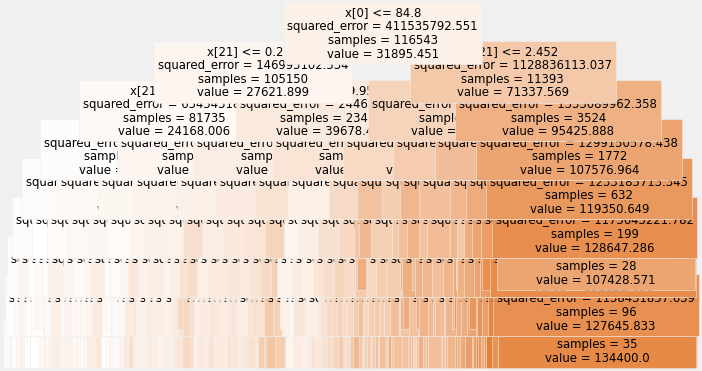

In [28]:

from sklearn.tree import plot_tree

print (f'Tree depth: {dt.get_depth()}')
fig = plt.figure(figsize=(8, 6))

plot_tree(dt, filled=True, ax=fig.gca(), fontsize='small');

In [22]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0, max_features = 'auto', max_depth = 20, 
                                 min_samples_split = 4, min_samples_leaf =8, n_jobs =-1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [23]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_percentage_error as mape


print('-------------ЛЕС-------------')
print("MAPE_test = {:.5f}".format((mape(y_test, y_pred)*100)))
print("MAPE_train = {:.5f}".format((mape(y_train, y_pred_train)*100)))
accuracy = regressor.score(X_test,y_test)
print('Accuracy = ', accuracy*100,'%')

MAPE_test = 21.36732
MAPE_train = 19.62502
Accuracy =  65.78886183241856 %


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [28]:
import xgboost as xgb

XG = xgb.XGBRegressor()

XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)
y_pred_train = XG.predict(X_train)
print('-------------БУСТ-------------')

print("MAPE_test = {:.5f}".format((mape(y_test, y_pred)*100)))
print("MAPE_train = {:.5f}".format((mape(y_train, y_pred_train)*100)))
accuracy = regressor.score(X_test,y_test)
print('Accuracy = ', accuracy*100,'%')

MAPE_test = 21.15753
MAPE_train = 20.59808
Accuracy =  65.78886183241856 %


**XGBoost provided the best results, nevertheless, I didn't tune it, I guess it may achieve 70% accuracy**